### Sentiment analysis using Twitter Data  on Turkey Earthquake

In [1]:
import numpy as np 
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob


import warnings
warnings.filterwarnings("ignore")

In [30]:
#Libraries for Text Handling
import string 
import re

#Library for nltk
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()




from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package vader_lexicon to C:\Users\Sarmita
[nltk_data]     Majumdar\AppData\Roaming\nltk_data...


In [31]:
tweets_df = pd.read_csv("tweets_1.csv")

In [32]:
print(f"data shape: {tweets_df.shape}")

data shape: (28844, 16)


In [33]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28844 entries, 0 to 28843
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                28844 non-null  object 
 1   user_name         28841 non-null  object 
 2   user_location     20767 non-null  object 
 3   user_description  26247 non-null  object 
 4   user_created      28844 non-null  object 
 5   user_followers    28844 non-null  object 
 6   user_friends      28843 non-null  float64
 7   user_favourites   28843 non-null  float64
 8   user_verified     28843 non-null  object 
 9   date              28843 non-null  object 
 10  text              28843 non-null  object 
 11  hashtags          17866 non-null  object 
 12  source            28842 non-null  object 
 13  retweets          28842 non-null  float64
 14  favorites         28842 non-null  float64
 15  is_retweet        28842 non-null  object 
dtypes: float64(4), object(12)
memory usage: 

In [34]:
tweets_df.describe()

,user_friends,user_favourites,retweets,favorites
count,28843.000000,2.884300e+04,28842.000000,28842.000000
mean,1170.971362,1.449773e+04,5.422856,31.998093
std,4501.074563,4.484412e+04,154.487067,1513.058316
min,0.000000,0.000000e+00,0.000000,0.000000
25%,76.000000,1.380000e+02,0.000000,0.000000
50%,313.000000,1.555000e+03,0.000000,1.000000
75%,1107.000000,9.319500e+03,1.000000,5.000000
max,310208.000000,1.418290e+06,25183.000000,247963.000000


In [35]:
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.62419E+18,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1,1.62416E+18,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
2,1.62414E+18,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
3,1.62412E+18,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
4,1.62412E+18,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False


#### Missing Values

In [36]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [37]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,3,8077,2597,0,0,1,1,1,1,1,10978,2,2,2,2
Percent,0.0,0.010401,28.002358,9.003606,0.0,0.0,0.003467,0.003467,0.003467,0.003467,0.003467,38.059908,0.006934,0.006934,0.006934,0.006934
Types,object,object,object,object,object,object,float64,float64,object,object,object,object,object,float64,float64,object


In [38]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [39]:
unique_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,28844,28841,20767,26247,28844,28844,28843,28843,28843,28843,28843,17866,28842,28842,28842,28842
Uniques,703,14389,4865,13274,14466,6301,3829,9893,2,27040,27661,8119,197,233,531,1


In [40]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [41]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,28844,28841,20767,26247,28844,28844,28843,28843,28843,28843,28843,17866,28842,28842,28842,28842
Most frequent item,1.62412E+18,MedyaNews,India,20+yrs of Research & Activism!\nA Truther tryi...,2022-12-24 21:51:51+00:00,0,0.0,0.0,False,2023-02-20 21:18:53+00:00,@VitalikButerin 1 eth \nAre you kidding Turkis...,['TurkeyEarthquake'],Twitter for Android,0.0,0.0,False
Frequence,442,392,852,320,368,436,695,553,26502,4,10,2102,9492,17135,10320,28842
Percent from total,1.532,1.359,4.103,1.219,1.276,1.512,2.41,1.917,91.884,0.014,0.035,11.765,32.91,59.41,35.781,100.0


#### Visualization

In [42]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### Tweet Source

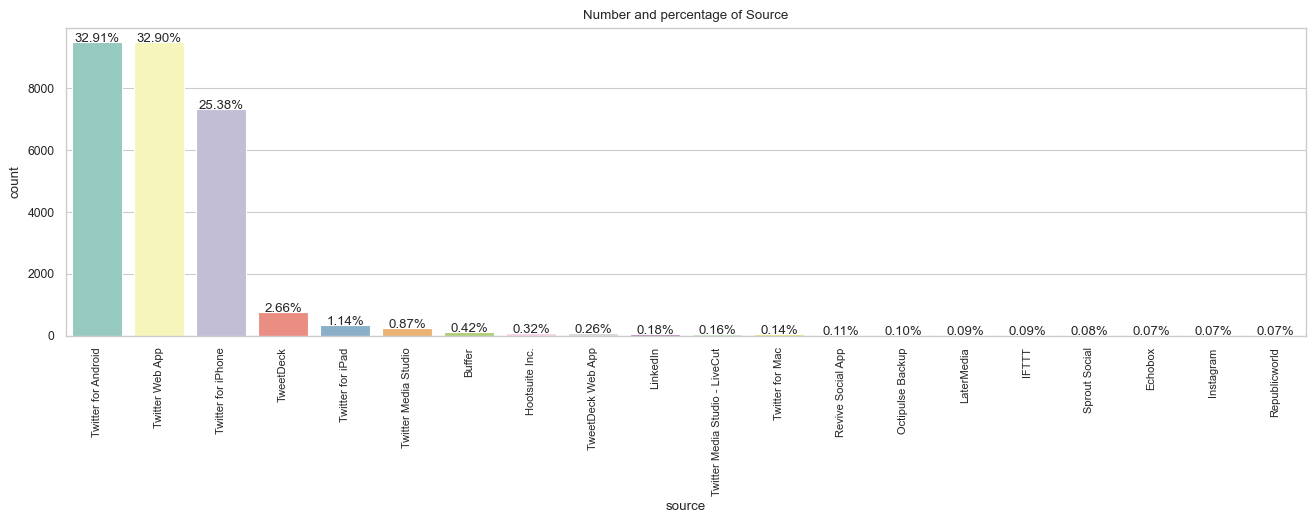

In [43]:
plot_count("source", "Source", tweets_df,4)

#### User Source

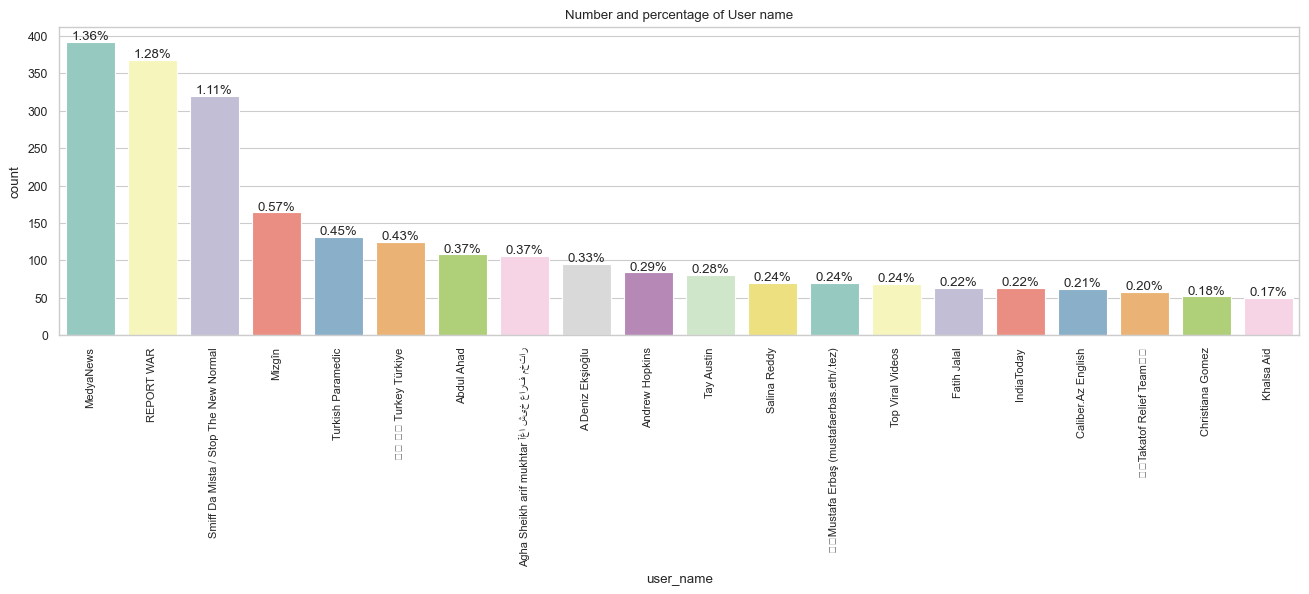

In [44]:
plot_count("user_name", "User name", tweets_df,4)

In [45]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    

#### WordCloud

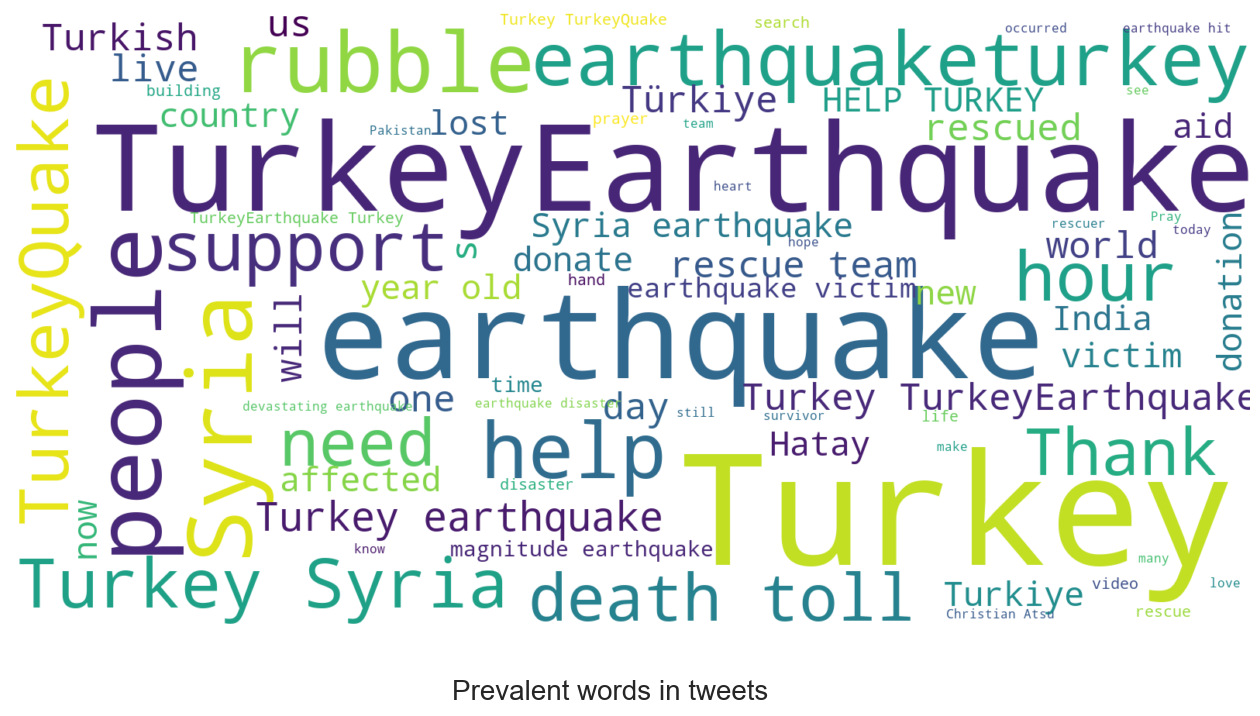

In [46]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

#### Extract Date- Time Feature

In [47]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [48]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

#### Variation In Time

In [74]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [75]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    sns.set(style="whitegrid")                                                 
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 20}                  
    sns.set_context("paper", rc = paper_rc)  
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

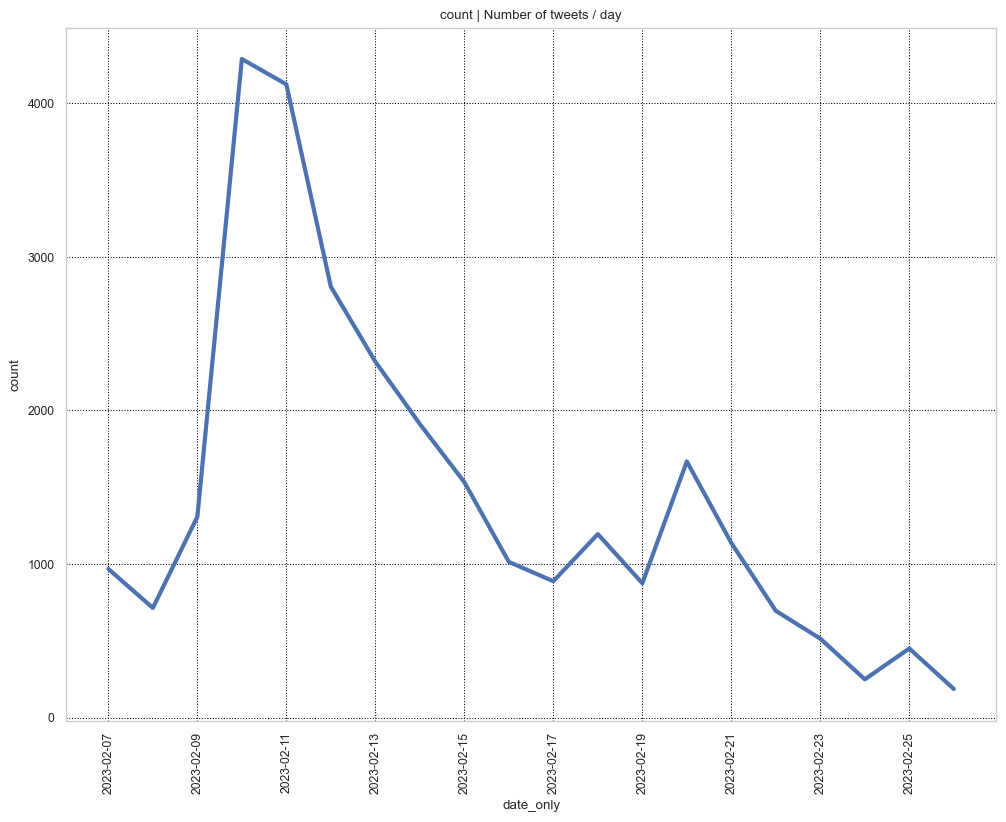

In [76]:
plot_time_variation(tweets_agg_df, x='date_only', title="Number of tweets / day",size=3)

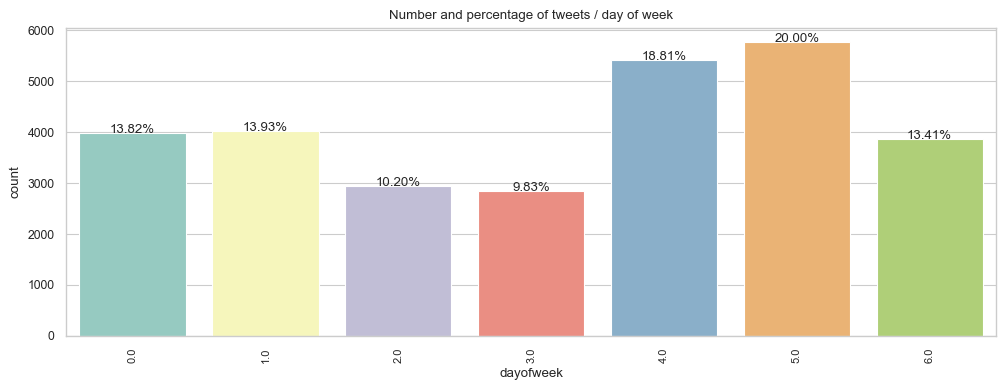

In [77]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

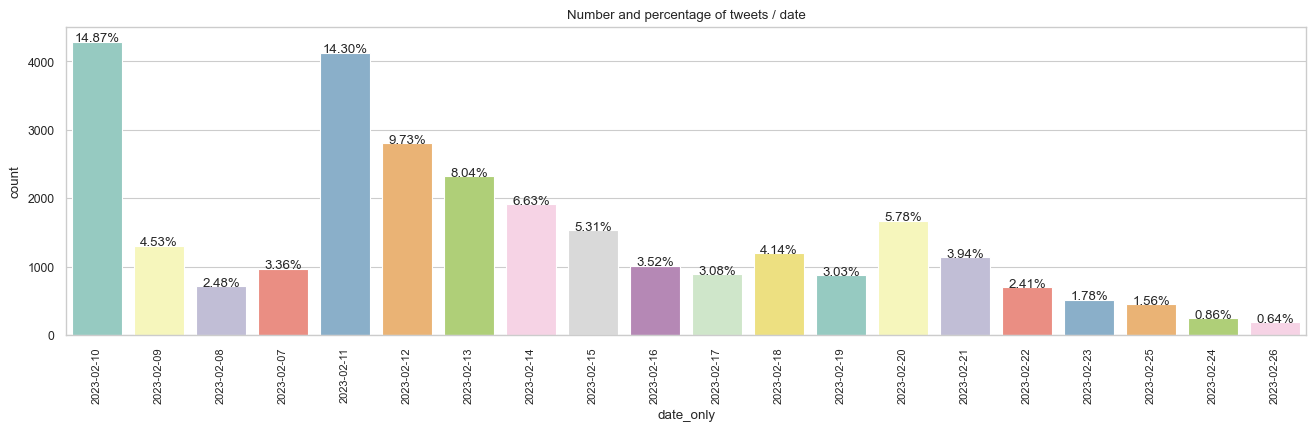

In [78]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

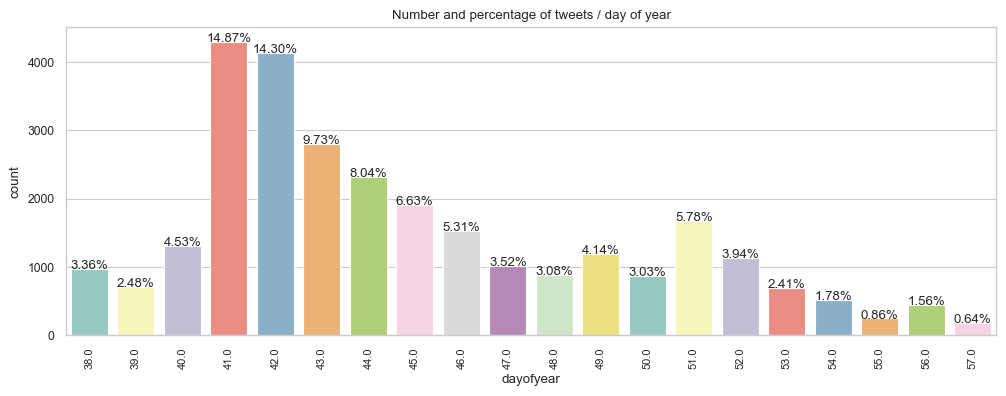

In [79]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

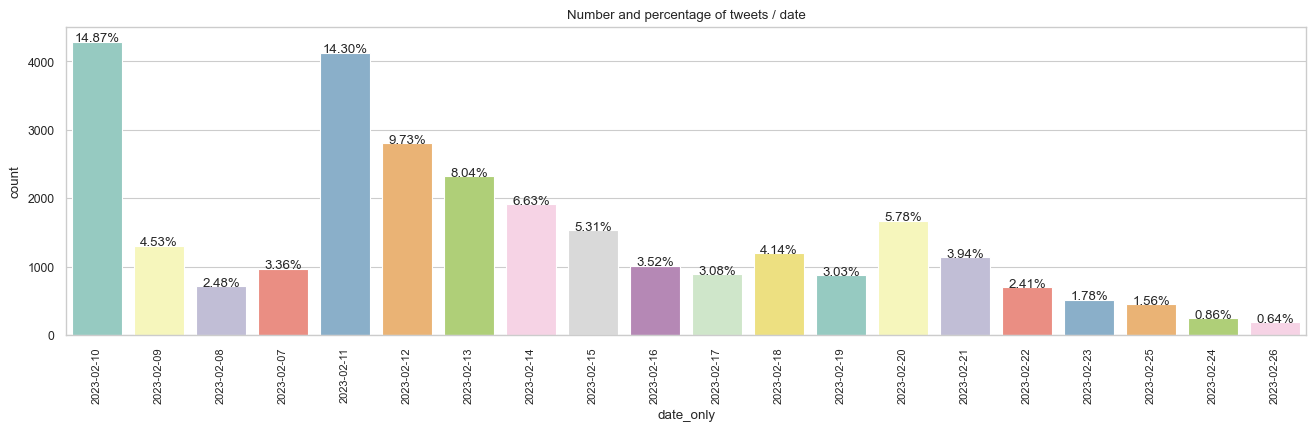

In [80]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)


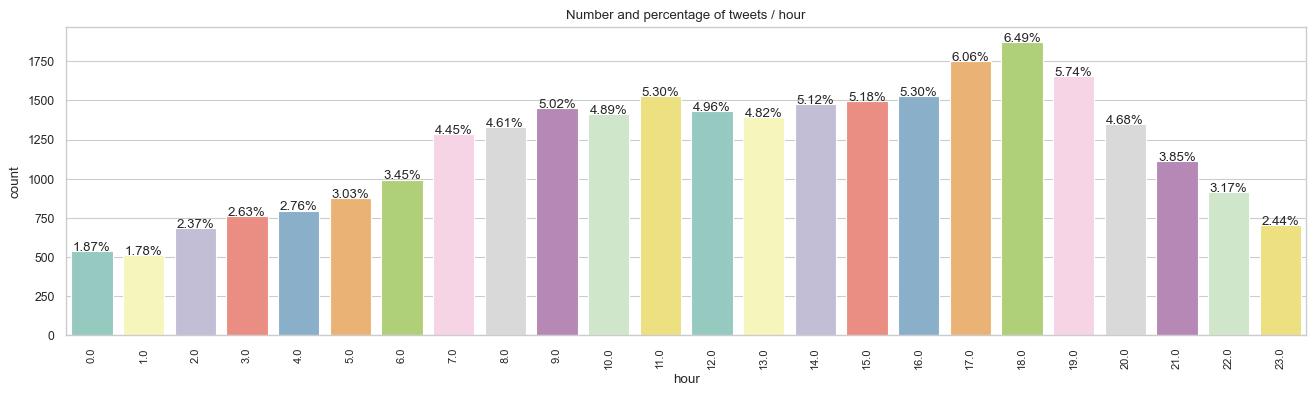

In [81]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

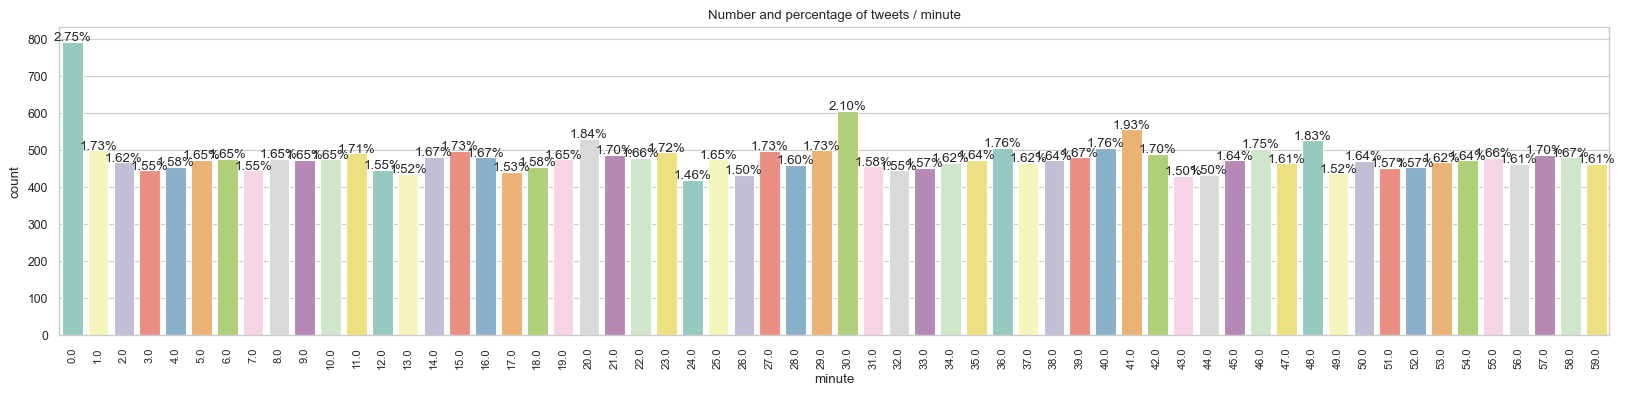

In [82]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)

In [83]:
# This is borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [84]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

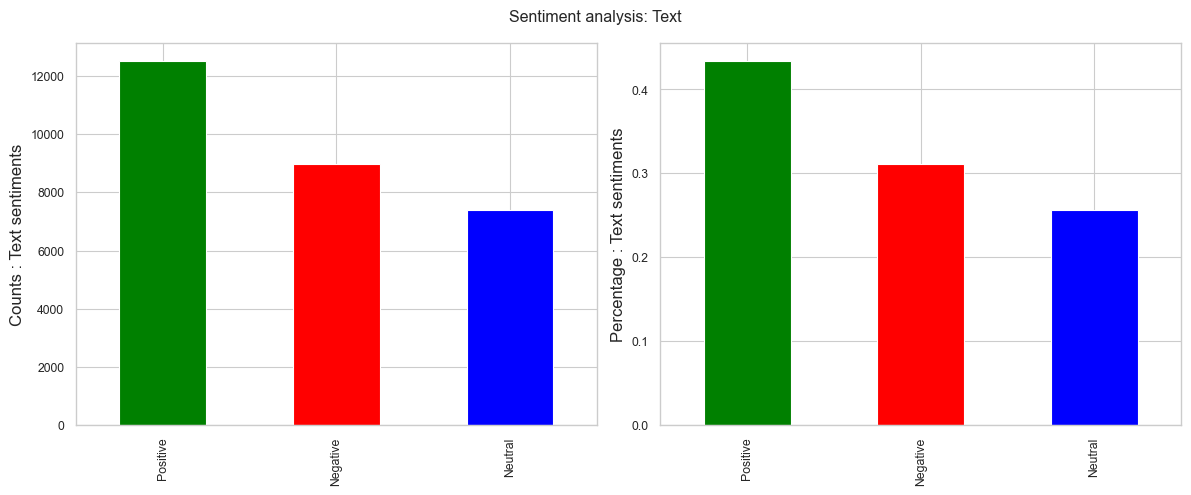

In [85]:
tweets_df['text_sentiment'] = tweets_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets_df, 'text_sentiment', 'Text')

### How the sentiment evolved during the last days.

In [86]:
tweets_agg_df = tweets_df.groupby(["date_only", "text_sentiment"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "text_sentiment", "count"]

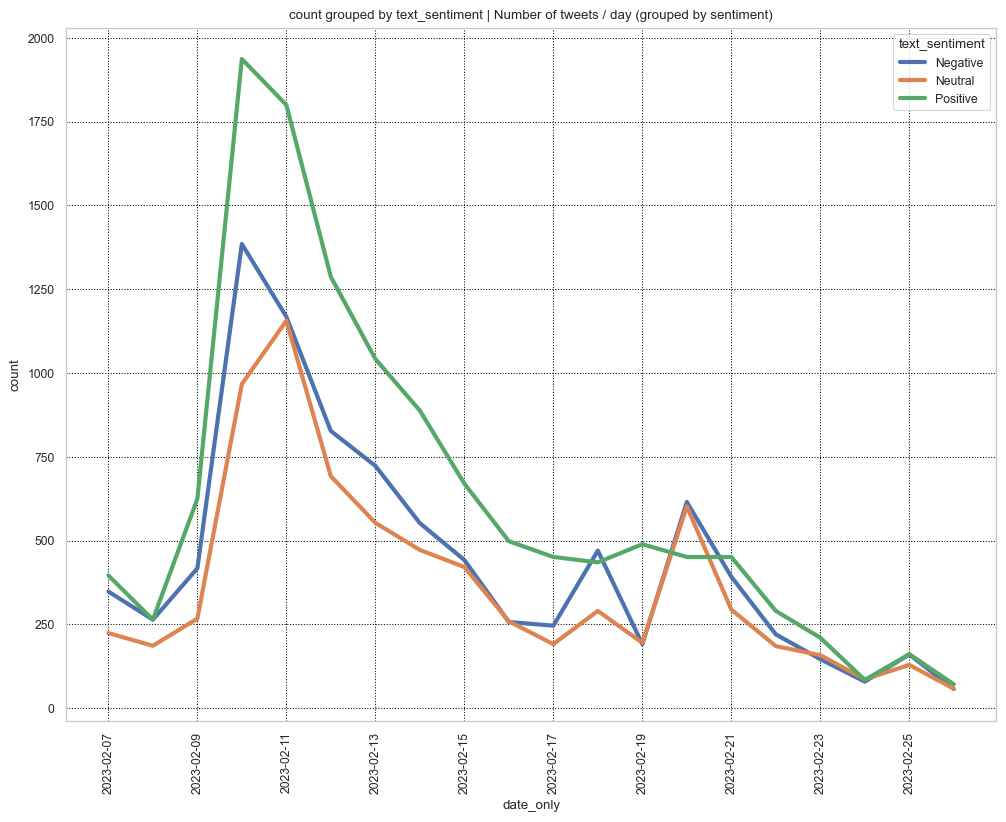

In [87]:
plot_time_variation(tweets_agg_df, x='date_only', hue="text_sentiment", title="Number of tweets / day (grouped by sentiment)",size=3)

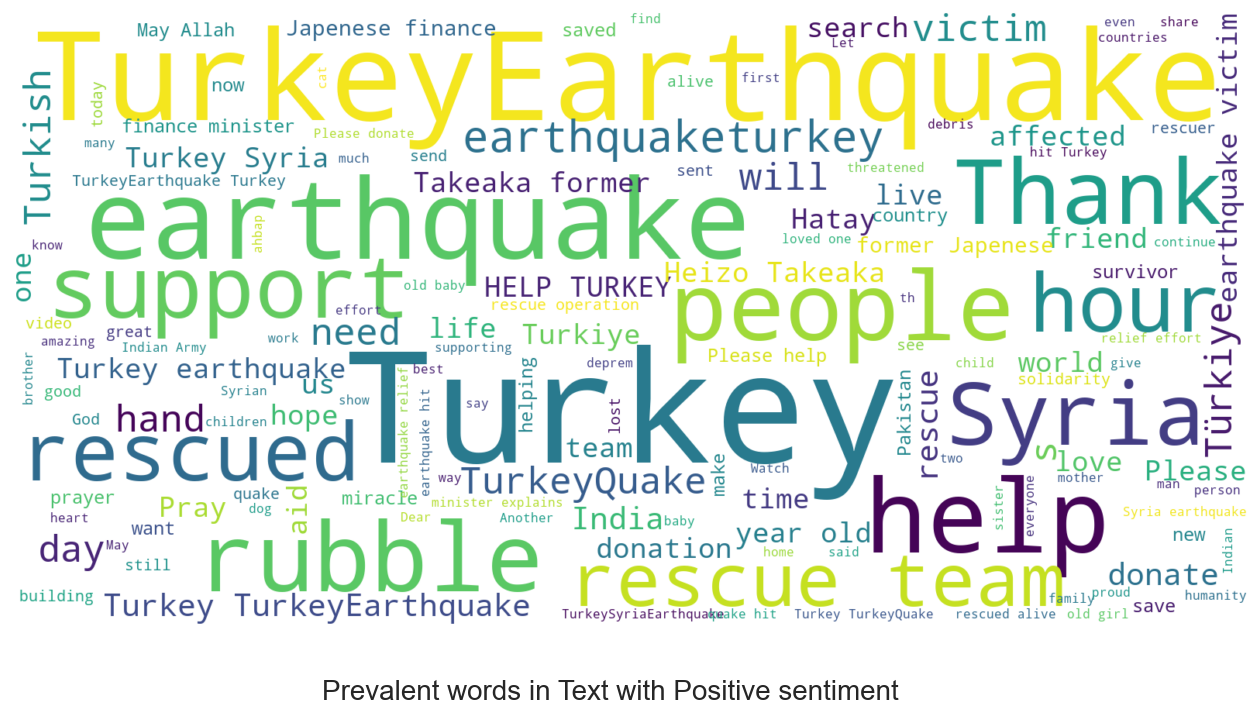

In [88]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Positive", 'text'], title = 'Prevalent words in Text with Positive sentiment', mask=None)


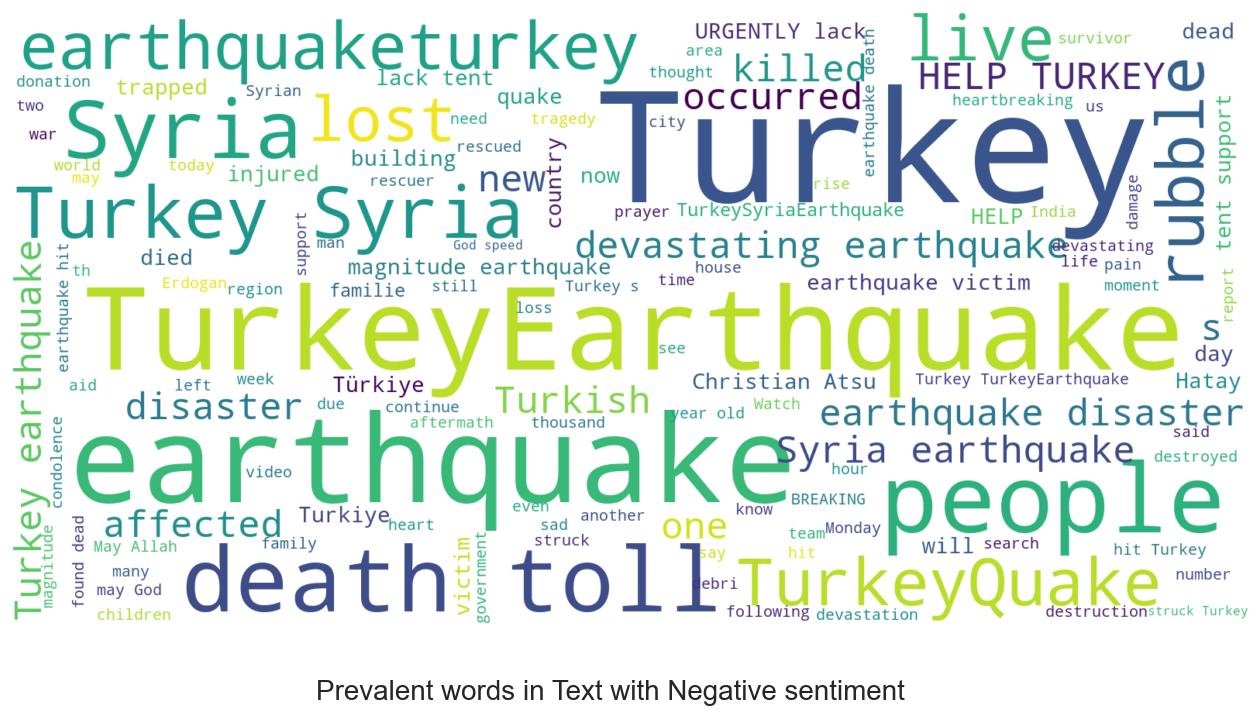

In [89]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Negative", 'text'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

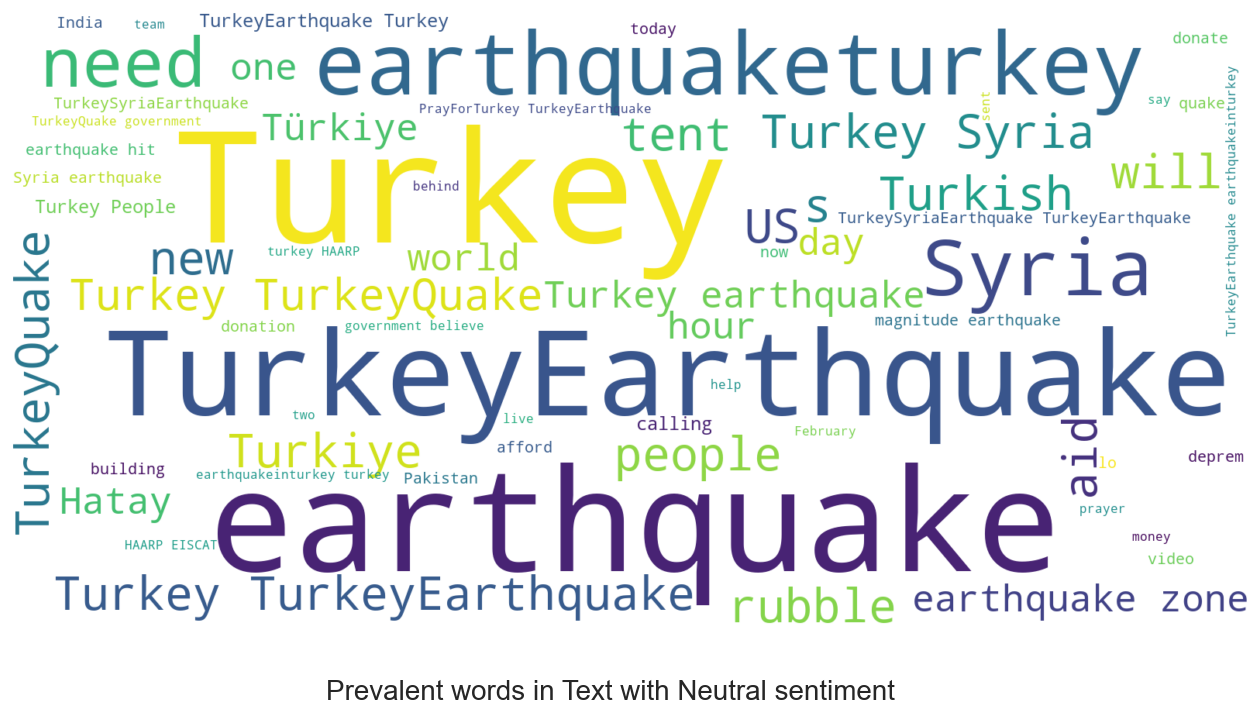

In [90]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Neutral", 'text'], title = 'Prevalent words in Text with Neutral sentiment', mask=None)
